In [4]:
import signac
import pandas as pd
import matplotlib
import numpy as np
from plot_functions import lineplot_functions_wrt_stride,barplot,pieplot
%matplotlib inline
import matplotlib.pyplot as plt

project = signac.get_project(root='../')
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.T

,09a0f7ef77cdc123e0ae83896e99ca98,17189e80d85cd2d338ce4c4b7acf69f9,3268aa99cba6d3e32f49e32c6257d761,41d804533356e20917897e45a8505071,91744f3151b5cd684d52e2b168338b42,c71ae9fe7c5c9f0d451a3abf7f2929f6,d1ba80f48913b53f526c97fe148f9cb4,e21a8c8b2973f907f62eba85205caa90
NPROCS,1,1,1,1,1,1,1,1
P,1,1,1,1,1,1,1,1
T,300,300,300,300,300,300,300,300
filter_group,"[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]","[Protein_NA_bound, 21]"
job_type,plumed_ds_sequential,plumed_sequential,plumed_ds_concurrent,plumed_sequential,traditional,plumed_ds_concurrent,plumed_ds_sequential,traditional
output_type,xtc,xtc,xtc,xtc,xtc,xtc,xtc,xtc
simulation_engine,gromacs,gromacs,gromacs,gromacs,gromacs,gromacs,gromacs,gromacs
simulation_time,2000,2000,2000,2000,2000,2000,2000,2000
stride,10,10,100,100,10,10,100,100
tau_profiling,True,True,True,True,True,True,True,True


In [5]:
for jobid in df.index:
    job=project.open_job(id=jobid)
    
    if job.sp.job_type=='traditional':
        job.document['workflow_type'] = 'Workflow 1'
    elif job.sp.job_type=='plumed_sequential':
        job.document['workflow_type'] = 'Workflow 2'
    elif job.sp.job_type=='plumed_ds_sequential':
        job.document['workflow_type'] = 'Workflow 3'
    elif job.sp.job_type=='plumed_ds_concurrent':
        job.document['workflow_type'] = 'Workflow 4'

df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)

plumed_ds_concurrent
10
['boost::enable_if<boost::s' 'DataSpacesReader::get_chu'
 'boost::enable_if<boost::s' 'DataSpacesReader::DataSpa'
 'PyVoronoiAnalyzer::initia' 'MPI_Init()' '_import_array'
 'boost::archive::text_iarc' 'void' 'void']
plumed_ds_concurrent
10
['boost::enable_if<boost::s' 'boost::enable_if<boost::s'
 'DataSpacesReader::get_chu' 'PyVoronoiAnalyzer::initia'
 'DataSpacesReader::DataSpa' '_import_array' 'MPI_Init()'
 'VoronoiAnalyzer::analyze(' 'boost::archive::text_iarc' 'void']


/home/sthomas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sthomas/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


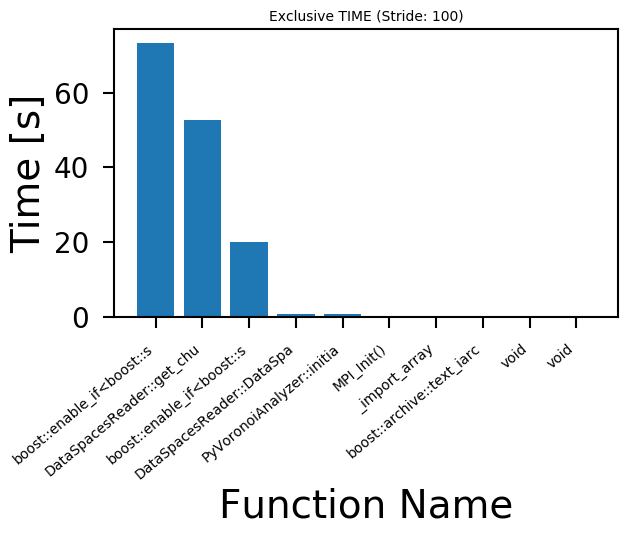

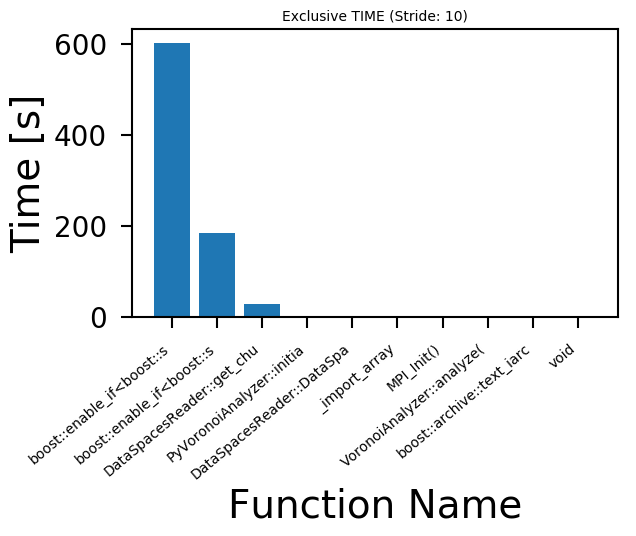

In [6]:
df_filtered = df[df.workflow_type=='Workflow 4']
for jobid in df_filtered.index:
    job = project.open_job(id=jobid)
    print(job.sp.job_type)
    df_temp = pd.read_csv(job.fn('profile.tsv'),delimiter='\t',skipfooter=4)
    df_temp['stride'] = job.sp.stride
    df_temp['Function_short']=df_temp.Function.apply(lambda x: x.split(' ')[0][:25])
    barplot(df_temp,'Exclusive TIME',job.sp.stride,ylabel='Time [s]',show_n_largest=10, multiplier=1e-6,logscale=False)